In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
!pip install --upgrade mplfinance

In [3]:
import mplfinance as mpf

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Accenture Stock Prediction/data/Accenture_stock_history.csv", parse_dates = ["Date"])
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2001-07-19,11.234038,11.375393,11.159640,11.286116,34994300,0.0,0
1,2001-07-20,11.196839,11.196839,11.010845,11.167080,9238500,0.0,0
2,2001-07-23,11.159637,11.167077,10.824848,11.159637,7501000,0.0,0
3,2001-07-24,11.122439,11.137319,10.936445,11.055481,3537300,0.0,0
4,2001-07-25,10.936445,11.122439,10.899246,11.122439,4208100,0.0,0
...,...,...,...,...,...,...,...,...
5077,2021-09-23,337.619995,344.739990,337.130005,343.000000,4543400,0.0,0
5078,2021-09-24,340.679993,342.880005,337.720001,339.230011,2035900,0.0,0
5079,2021-09-27,337.519989,337.720001,333.079987,334.510010,2025300,0.0,0
5080,2021-09-28,331.559998,332.019989,323.859985,324.209991,2300500,0.0,0


In [5]:
fig = go.Figure([go.Scatter(x = df["Date"], y = df["Close"])])
fig.show()

In [6]:
fig = go.Figure([go.Scatter(x = df["Date"], y = df["High"])])
fig.show()

In [7]:
fig = go.Figure([go.Scatter(x = df["Date"], y = df["Low"])])
fig.show()

In [8]:
fig = go.Figure(
    data = [go.Candlestick(x = df["Date"],
                           open = df["Open"],
                           close = df["Close"],
                           high = df["High"],
                           low = df["Low"])]
)
fig.show()

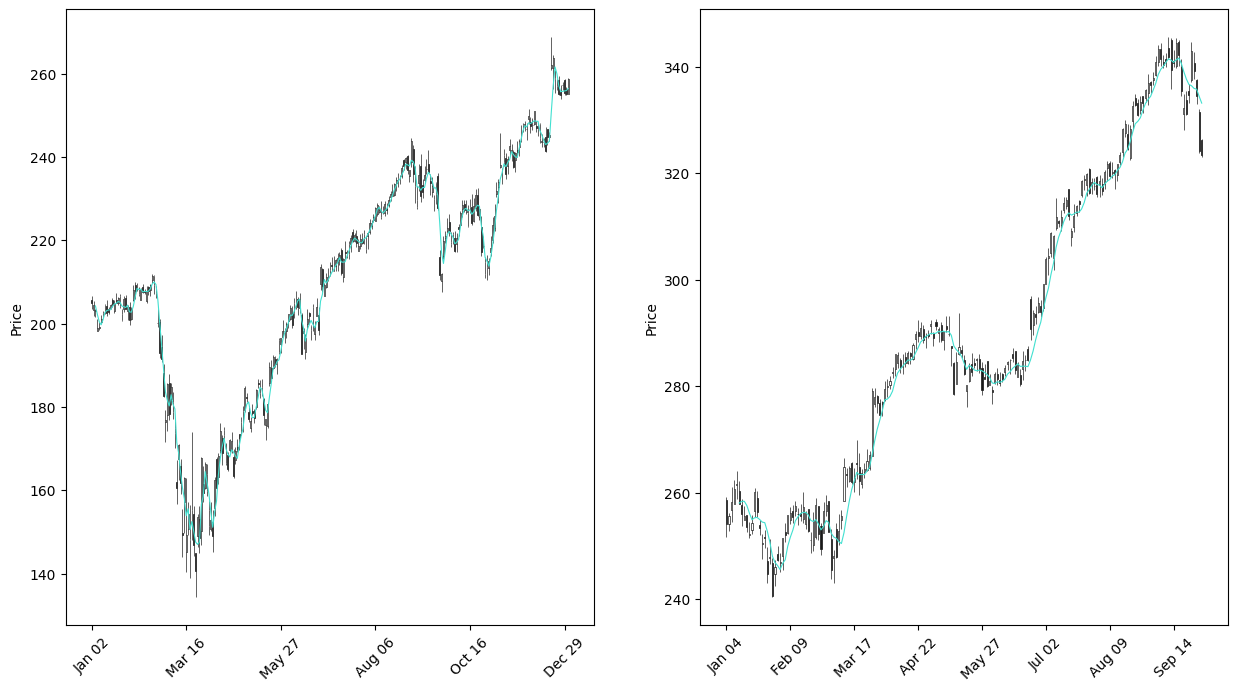

In [9]:
df_tmp = df.set_index("Date")
fig, ax = plt.subplots(1,2, figsize = (15, 8))
mpf.plot(df_tmp.loc["2020"], type = "candle", ax = ax[0], mav = 3)
mpf.plot(df_tmp.loc["2021"], type = "candle", ax = ax[1], mav = 6)

In [10]:
series = df["Close"].to_numpy()
series

array([ 11.28611565,  11.16707993,  11.15963745, ..., 334.51000977,
       324.20999146, 323.52999878])

In [52]:
def to_sequence(data, sequence_length):
  series = []
  label = []
  for i in range(len(data) - sequence_length):
    X = data[i: i + sequence_length]
    y = data[i + sequence_length]
    series.append(X)
    label.append(y)
  return np.array(series), np.array(label)
X, y = to_sequence(series, 1)

In [53]:
train_size = 0.7
calcu = int(X.shape[0] * train_size)
X_train, y_train = X[:calcu], y[:calcu]
X_test, y_test = X[calcu:], y[calcu:]

In [54]:
import tensorflow as tf

In [55]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, activation = "relu", input_shape = (1,1)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss = tf.keras.losses.MSE, metrics= [tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score()]);

In [56]:
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), validation_split = 0.2, batch_size = 16, epochs = 50)

Epoch 1/50
223/223 [==============================] - 3s 4ms/step - loss: 462.0160 - root_mean_squared_error: 21.4946 - r2_score: -0.0410 - val_loss: 43.3888 - val_root_mean_squared_error: 6.5870 - val_r2_score: 0.9886
Epoch 2/50
223/223 [==============================] - 1s 3ms/step - loss: 5.1573 - root_mean_squared_error: 2.2710 - r2_score: 0.9884 - val_loss: 18.4280 - val_root_mean_squared_error: 4.2928 - val_r2_score: 0.9951
Epoch 3/50
223/223 [==============================] - 1s 4ms/step - loss: 3.1299 - root_mean_squared_error: 1.7692 - r2_score: 0.9929 - val_loss: 11.5277 - val_root_mean_squared_error: 3.3952 - val_r2_score: 0.9970
Epoch 4/50
223/223 [==============================] - 1s 3ms/step - loss: 1.9790 - root_mean_squared_error: 1.4068 - r2_score: 0.9955 - val_loss: 7.1069 - val_root_mean_squared_error: 2.6659 - val_r2_score: 0.9981
Epoch 5/50
223/223 [==============================] - 1s 3ms/step - loss: 1.3212 - root_mean_squared_error: 1.1494 - r2_score: 0.9970 - v

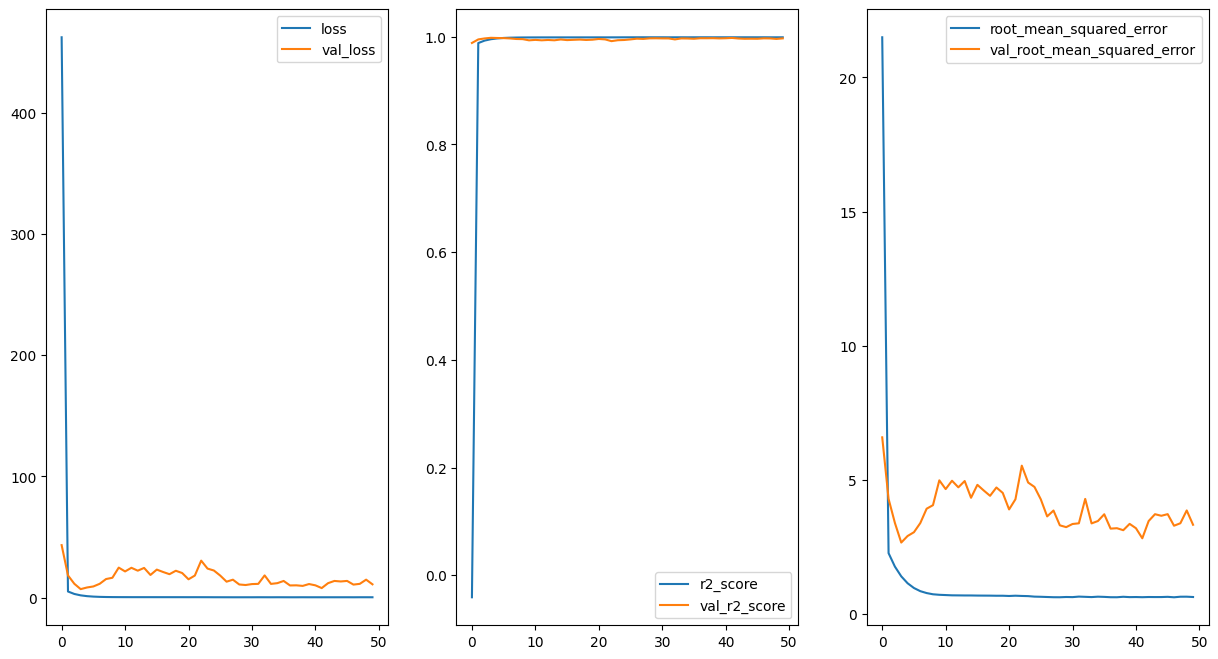

In [57]:
# Loss
fig, axes = plt.subplots(1,3, figsize = (15, 8))
axes[0].plot(r.history["loss"], label = "loss")
axes[0].plot(r.history["val_loss"], label = "val_loss")
axes[0].legend()

axes[1].plot(r.history["r2_score"], label = "r2_score")
axes[1].plot(r.history["val_r2_score"], label = "val_r2_score")
axes[1].legend()

axes[2].plot(r.history["root_mean_squared_error"], label = "root_mean_squared_error")
axes[2].plot(r.history["val_root_mean_squared_error"], label = "val_root_mean_squared_error")
axes[2].legend()

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
y_preds = model.predict(X_test)
print(f"""
MAE:{mean_absolute_error(y_test, y_preds)}
MSE:{mean_squared_error(y_test, y_preds)}
RMSE:{np.sqrt(mean_squared_error(y_test, y_preds))}
MSLE{mean_squared_log_error(y_test, y_preds)}
RMSLE:{np.sqrt(mean_squared_log_error(y_test ,y_preds))}
R2_SCORE:{r2_score(y_test, y_preds)}
      """)

48/48 [==============================] - 0s 2ms/step

MAE:2.321572715884349
MSE:11.081170902998009
RMSE:3.3288392726291263
MSLE0.00031070624842252447      
RMSLE:0.0176268615590673
R2_SCORE:0.9970780777041306
      


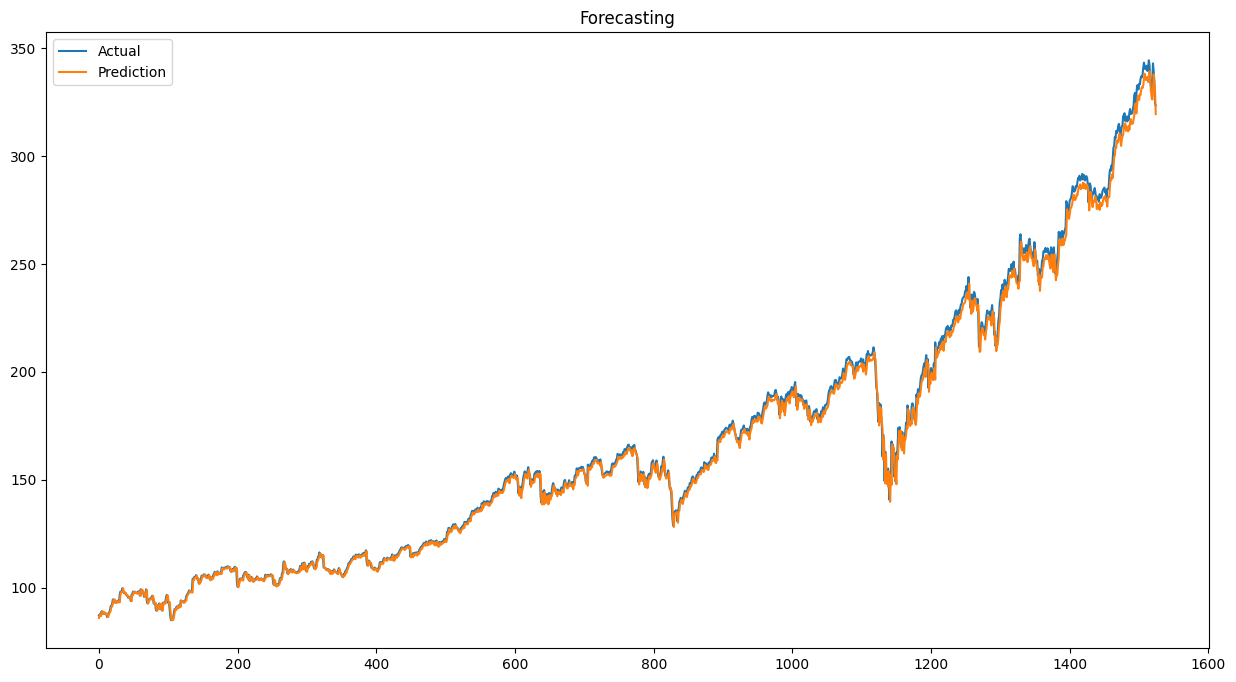

In [59]:
plt.figure(figsize = (15, 8))
plt.title("Forecasting")
plt.plot(y_test, label = "Actual")
plt.plot(y_preds, label = "Prediction")
plt.legend()
plt.show()

In [78]:
df["Price_Tom"]= df["Close"].shift(-1)
condition = []
for tom, now in zip(df["Price_Tom"], df["Close"]):
  if tom - now > 0:
    condition.append(1)
  else:
    condition.append(0)
df["Tomorrow"] = condition
df.drop(columns = ["Dividends", "Stock Splits"], inplace = True)
df["Day"] = df["Date"].dt.day
df["DayofWeek"] = df["Date"].dt.dayofweek
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year
df["Dayofyear"] = df["Date"].dt.dayofyear
df_pred = df.copy()
df_pred.drop(index = [5081], inplace = True)

<Axes: xlabel='Tomorrow', ylabel='count'>

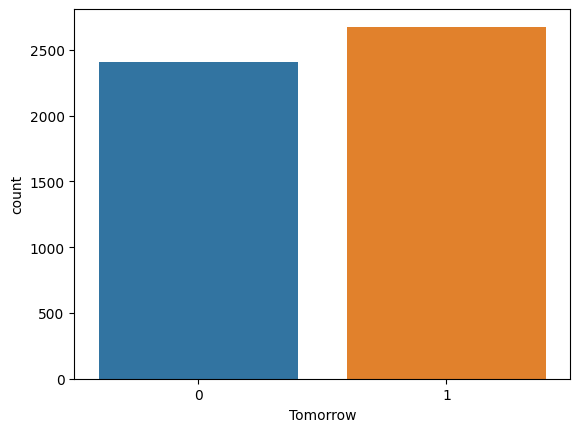

In [24]:
sns.countplot(df_pred, x = "Tomorrow")

In [79]:
X = df_pred.drop(columns = ["Tomorrow", "Date", "Price_Tom"], axis = 1)
y = df_pred.Tomorrow
X_train, X_test, y_train, y_test = X[:calcu], X[calcu:], y[:calcu], y[calcu:]

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [27]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
rfc.score(X_test, y_test)

0.43717277486910994

              precision    recall  f1-score   support

           0       0.39      0.06      0.10       664
           1       0.56      0.93      0.70       864

    accuracy                           0.55      1528
   macro avg       0.48      0.49      0.40      1528
weighted avg       0.49      0.55      0.44      1528



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



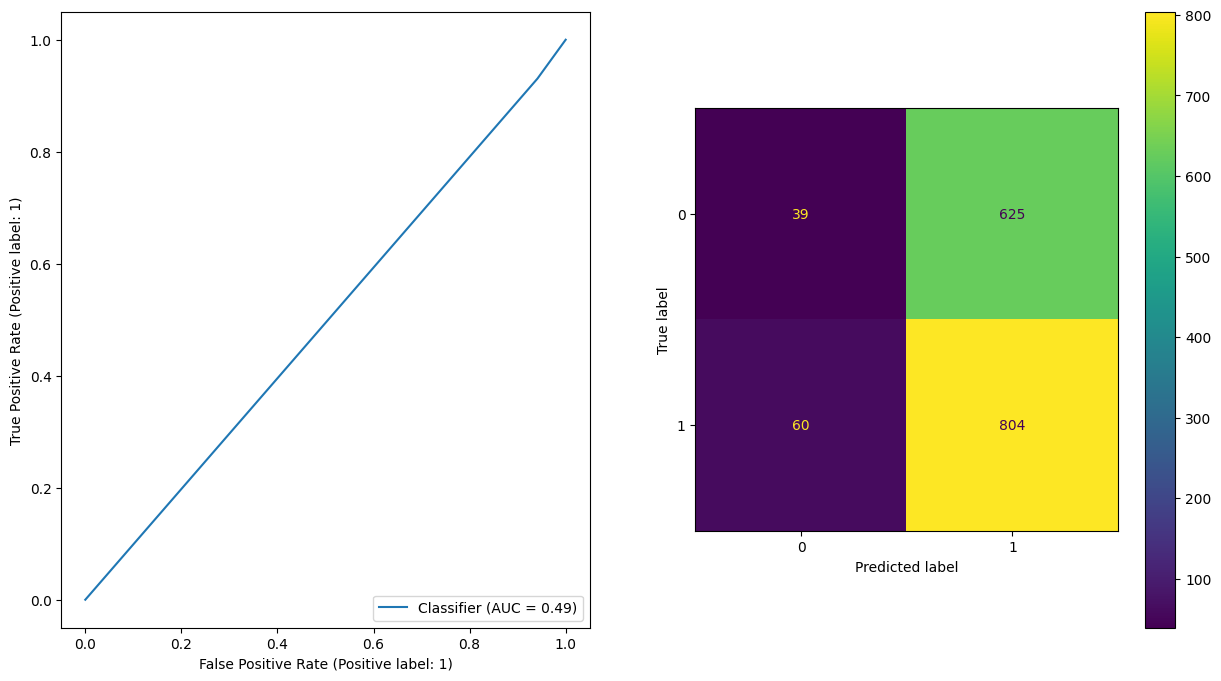

In [45]:
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
scale = StandardScaler()
X_train, X_test = scale.fit_transform(X_train), scale.transform(X_test)
y_preds = rfc.predict(X_test)

print(classification_report(y_test, y_preds))
fig, axes = plt.subplots(1,2,figsize = (15, 8))
RocCurveDisplay.from_predictions(y_test, y_preds, ax = axes[0])
ConfusionMatrixDisplay.from_predictions(y_test, y_preds, ax= axes[1])

In [30]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [31]:
svc.score(X_test, y_test)

0.5667539267015707

              precision    recall  f1-score   support

           0       0.53      0.03      0.06       664
           1       0.57      0.98      0.72       864

    accuracy                           0.57      1528
   macro avg       0.55      0.50      0.39      1528
weighted avg       0.55      0.57      0.43      1528



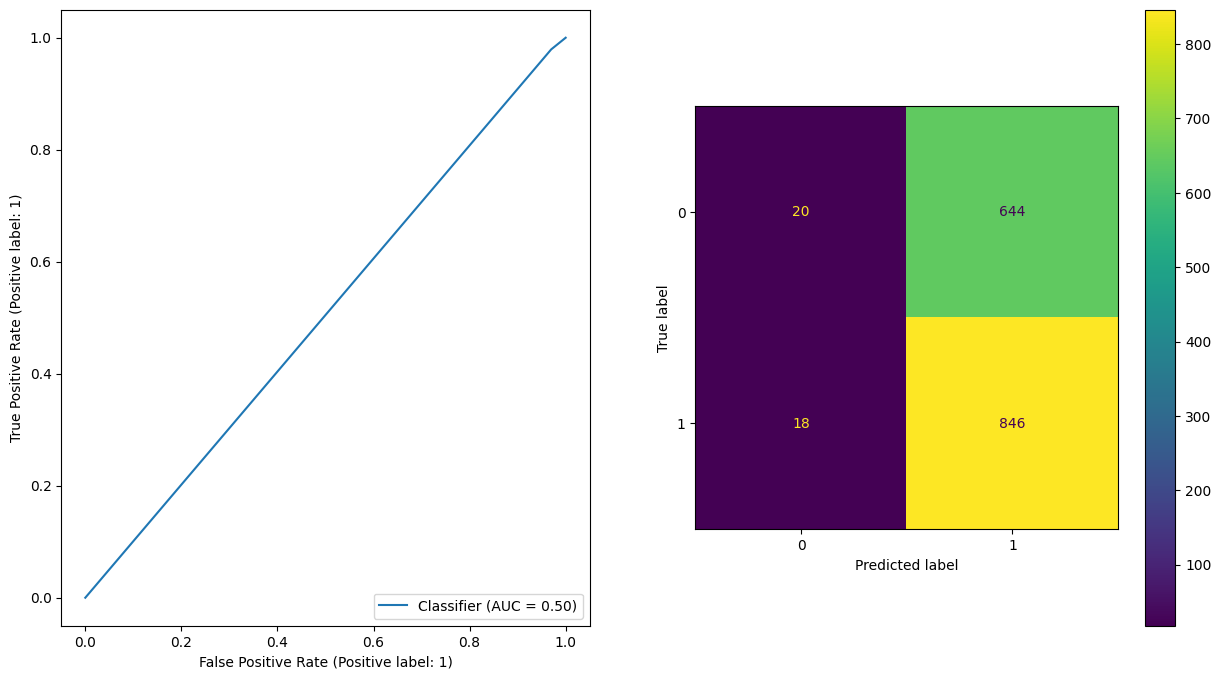

In [32]:
y_preds = svc.predict(X_test)

print(classification_report(y_test, y_preds))
fig, axes = plt.subplots(1,2,figsize = (15, 8))
RocCurveDisplay.from_predictions(y_test, y_preds, ax = axes[0])
ConfusionMatrixDisplay.from_predictions(y_test, y_preds, ax= axes[1])

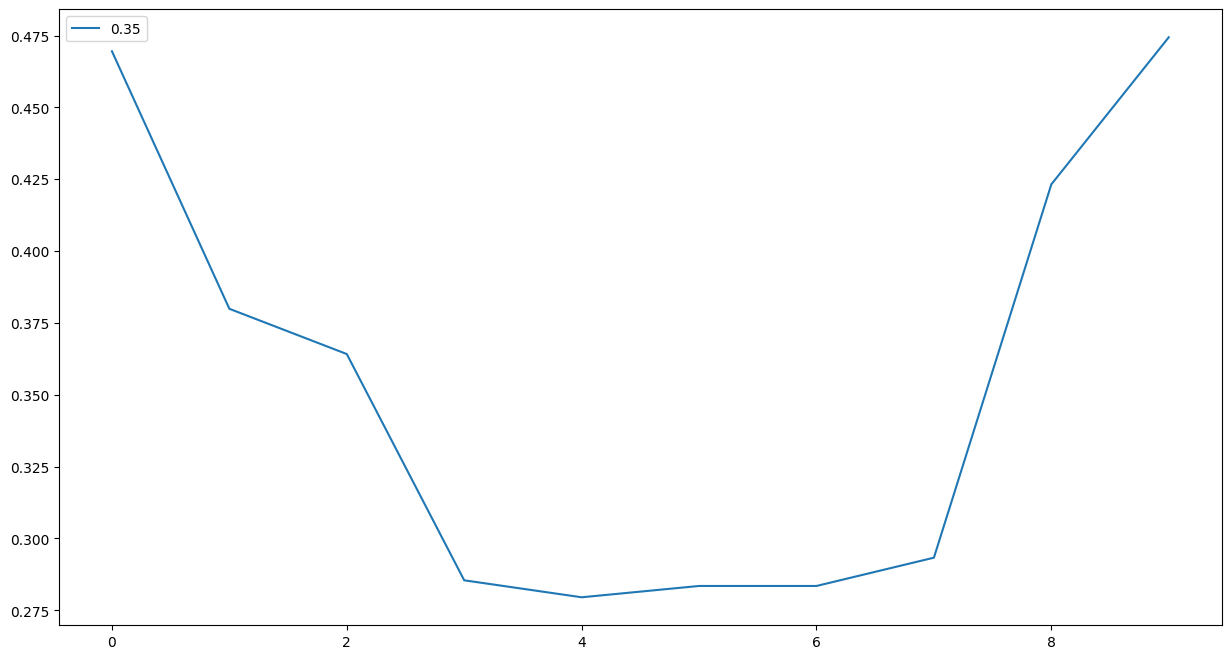

In [33]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rfc, X,y,cv =10)
plt.figure(figsize = (15, 8))
plt.plot(score, label = np.round(np.mean(score), 2))
plt.legend()

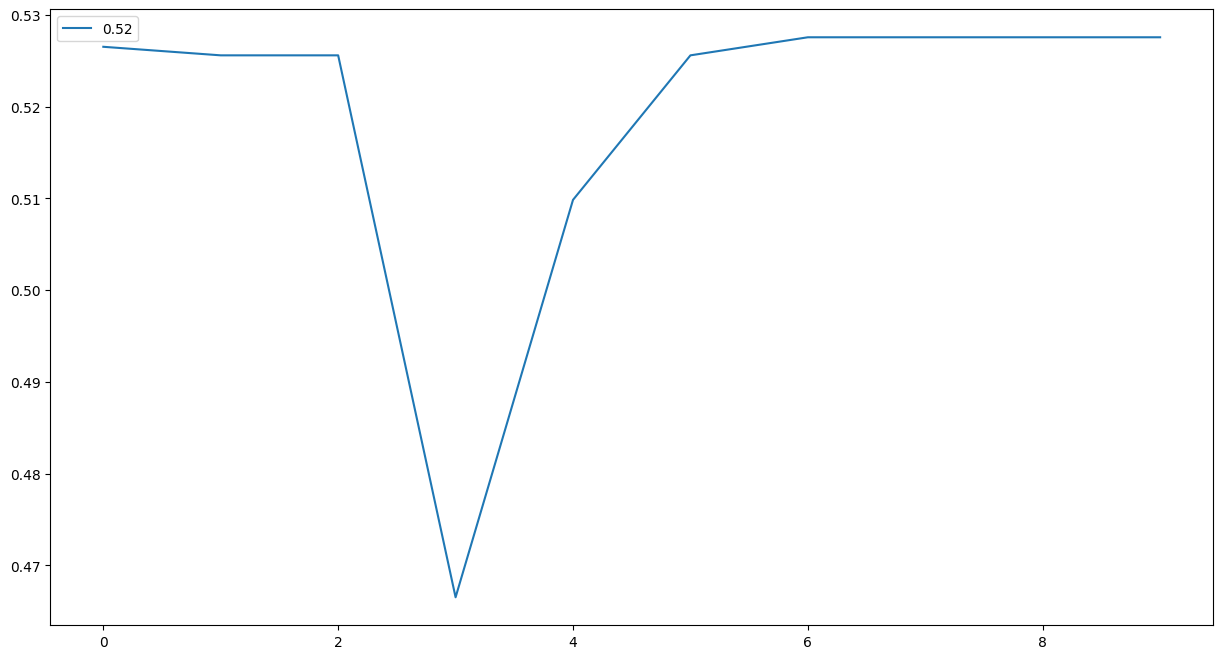

In [34]:
score = cross_val_score(svc, X,y,cv =10)
plt.figure(figsize = (15, 8))
plt.plot(score, label = np.round(np.mean(score), 2))
plt.legend()

In [35]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf',],
    'gamma': ['scale', 'auto'],
}

In [36]:
from sklearn.model_selection import GridSearchCV

svc_tuned = GridSearchCV(svc, param_grid, cv = 5, n_jobs = -1)
svc_tuned.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [39]:
svc_tuned.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       664
           1       0.57      1.00      0.72       864

    accuracy                           0.57      1528
   macro avg       0.28      0.50      0.36      1528
weighted avg       0.32      0.57      0.41      1528



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



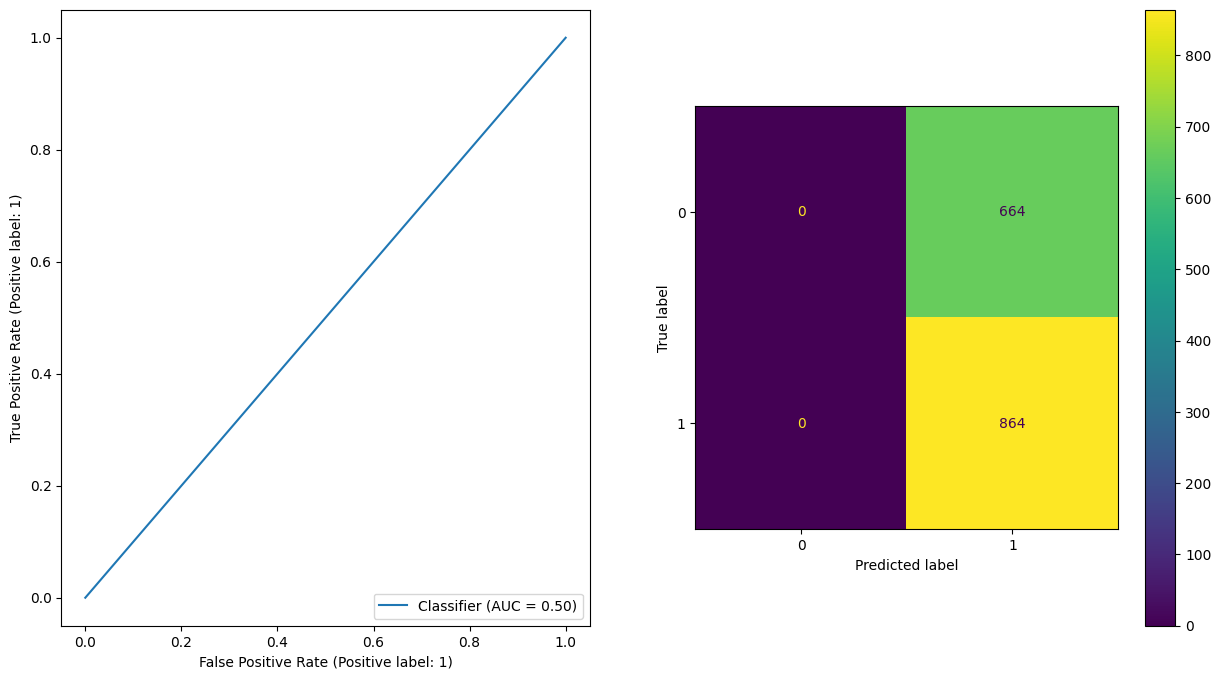

In [41]:
y_preds = svc_tuned.predict(X_test)

print(classification_report(y_test, y_preds))
fig, axes = plt.subplots(1,2,figsize = (15, 8))
RocCurveDisplay.from_predictions(y_test, y_preds, ax = axes[0])
ConfusionMatrixDisplay.from_predictions(y_test, y_preds, ax= axes[1])

In [84]:
print(f"""
Price Tommorow: ${np.round(model.predict([[354.45]])[0][0],2)}
Will it go up tommorow: {svc.predict([[350.00,354.82,347.91,354.45,2,313,932, 26,3,12,2023,360]])}
""")

1/1 [==============================] - 0s 54ms/step

Price Tommorow: $349.05999755859375
Will it go up tommorow: [1]     

